<h1><u>Handling missing data (like a boss!)</u></h1>
<p>Objective : To explore the various ways to handle missing values in a dataset and create a nifty snippet library while at it.
<p style="color:#666666">Last updated: 28th Jun 2017<br>Akshay Sehgal, www.akshaysehgal.com<br>Data downloadable at </p>

## 1. Introduction

Missing data is the nemesis of a data scientist, specially if they are still new to the field. They are so facinated by the new models and algorithms they learn that they want to apply them on any dataset they can get their hands on. But, alas, missing data says 'Not today'. I learnt my lesson in those days and while I know people who are wizards at data handling (1 function to rule them all), I unfortunately am not that adept with my Python skills at the moment. However, I with what little python programming I can boldly muster, I present to you the standard and advance Missing Data handling techniques I have learnt over the years.

The things I talk about: 
1. Detecting missing values
2. Handling missing data
    -  Remove rows with missing data
    -  Remove rows for specific variables
    -  Drop variables with missing data
    -  Impute missing data
    -  Predict missing data using ML
    
<b>Please note, there is no fixed order of applying these. However depending on the data at hand, you can devise a good order to use them. Sometimes even apply them more than once!</b>

With that warning, let's begin.

In [326]:
#Call Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

%matplotlib inline

In [327]:
#Reading the dataset
df = pd.read_csv("titanic.csv")
df.head()

Pclass  Survived                                             Name     Sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       Age  Sibsp  Parch  Ticket      Fare    Cabin Embarked Boat   Body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         Home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

## 2. Detecting missing values

Here is where the fun begins. Thanks to <a href="https://github.com/ResidentMario" target="_blank">Aleksey Bilogur</a>, missing data detection just became one of the coolest stages of the whole process. The visualizations he has made are state of the art. Lets discuss some of them.

The first one is Matrix. Shows data density over the whole plane, and shows a sparkline to the left showing row by row variation in count of non_null values (13 here means that the max number of non null values any row has in the data base is thirteen) 

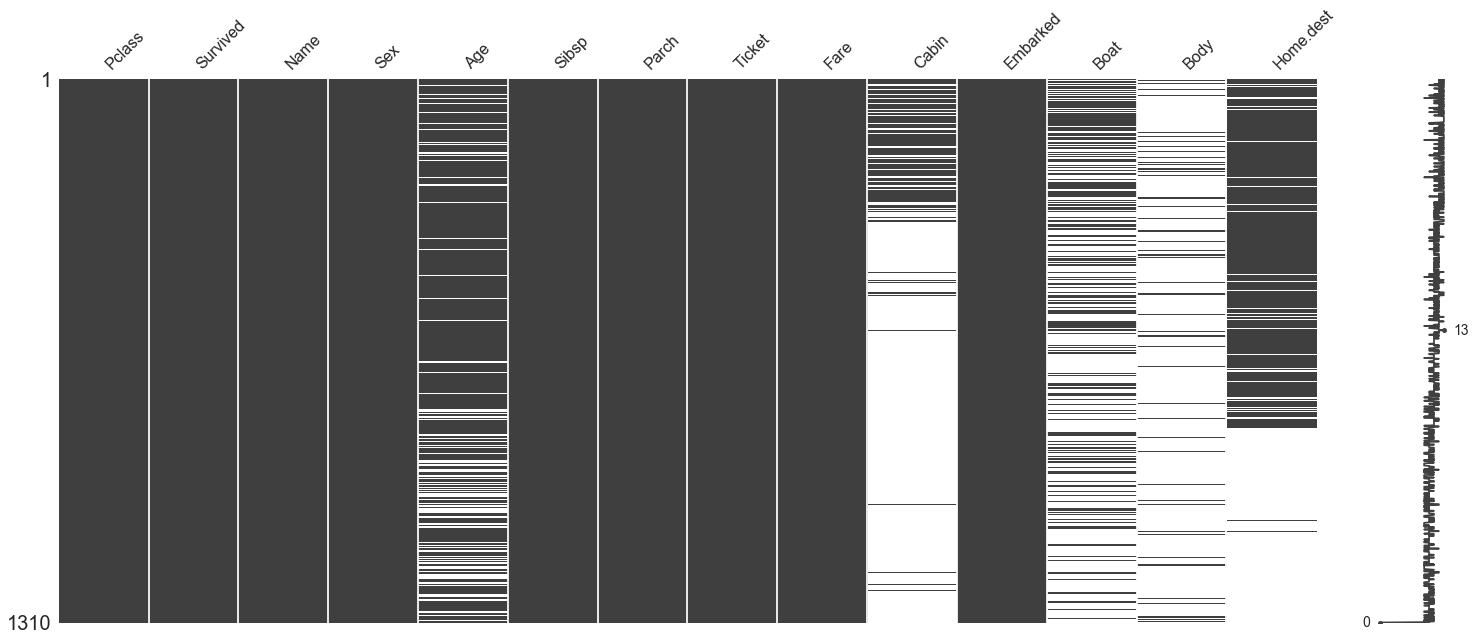

In [13]:
#Visualizing missing data using a cool matrix visualization
msno.matrix(df)

However cool the previous visualization may look, the most practical one is actually the Bar(). It shows straight forward count of missing values by columns.

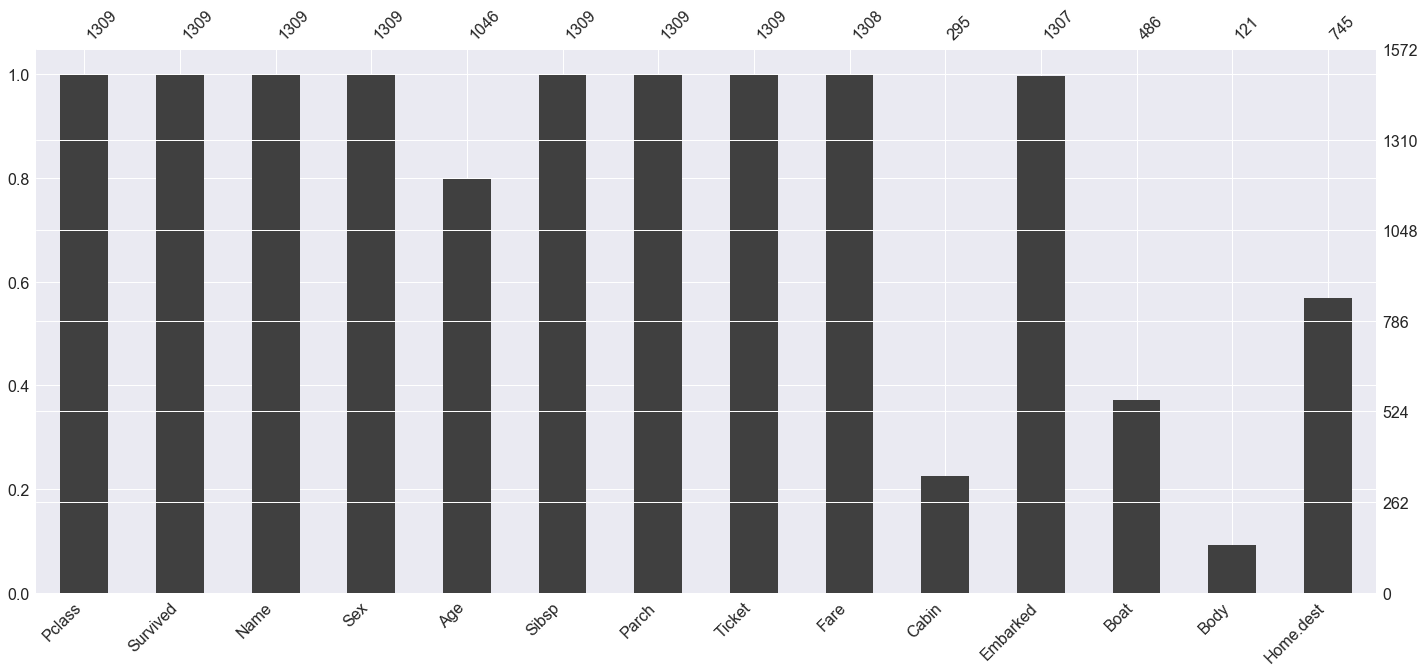

In [328]:
#Another cool, but more practical visualization
msno.bar(df)

Finally, the last one can be very very important when we start working with handling the missing values and even if we are trying to predict them. The values in the matrix below are Nullity correlation. 

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Here we see that the variable Body has a inverse nullity correlation with Boat, meaning a large number of rows that may have one of the variables will not have the other, and vice-versa. An powerful way you can use it will be detailed below in the section 3.5.

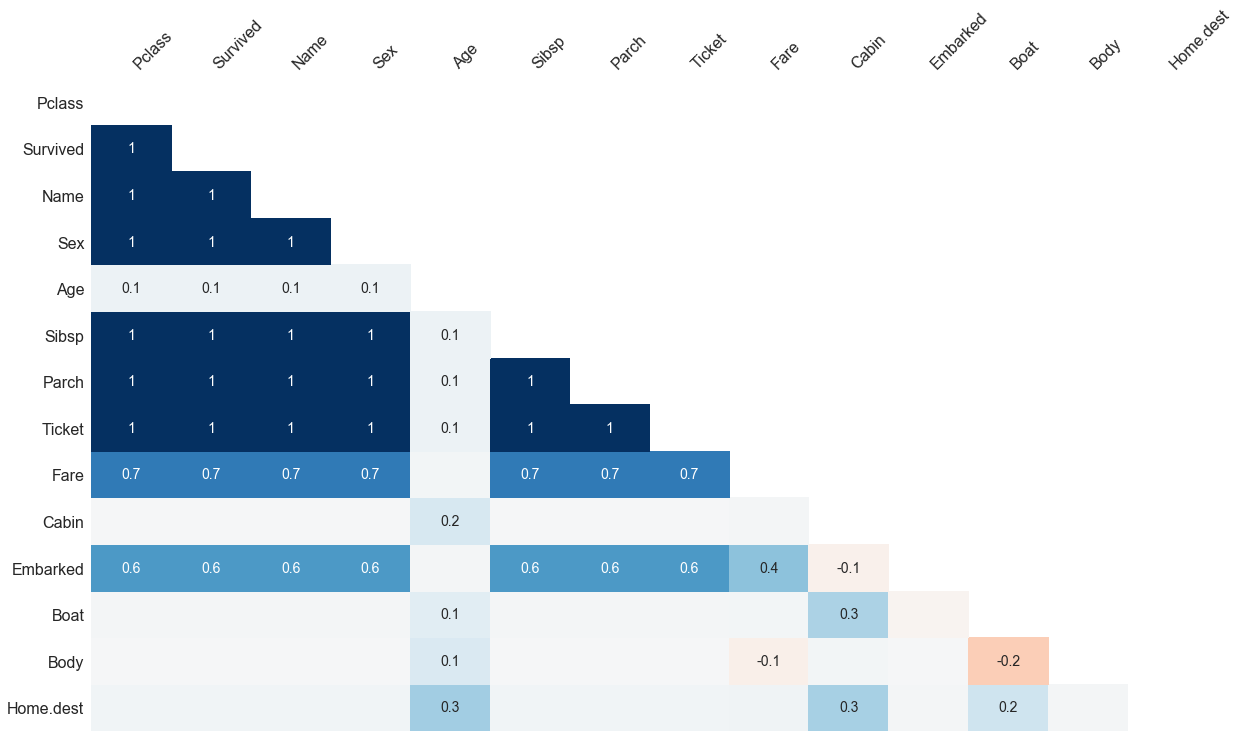

In [329]:
#Nullity correlation - Does having or not having missing values for a variable correlate with that of others?
msno.heatmap(df)

## 3. Handling missing data

Now to start with some proper code. As mentioned above, I will try to elaborate 5 types of missing data handling. 
Some will be trivial, yet I will try to give you a fresh take on each of these, so bear along with me!

### 3.1 Remove rows with missing data

Simplest yet the most impractical way to handle missing data is using dropna() directly on a dataset. Hoever, you can using it over both axes and also define a threshold of what are the minimum number of variables each row must have to remain in the dataset. Examples shown below:

In [330]:
#Straight application of dropna(), 0 rows remain, ouch.
print("Count before cleaning",df.shape)
df1 = df.dropna()
print("Count after cleaning",df1.shape)

Count before cleaning (1310, 14)
Count after cleaning (0, 14)


In [331]:
#Applying it on columns, ofcourse the result would be the same, this time 0 columns left.
print("Count before cleaning",df.shape)
df2 = df.dropna(axis=1)
print("Count after cleaning",df2.shape)

Count before cleaning (1310, 14)
Count after cleaning (1310, 0)


In [335]:
#Using threshold=5 (each row must have 5 non null values atleast) and something interesting shows.
print("Count before cleaning",df.shape)
df3 = df.dropna(thresh=11)
print("Count after cleaning",df3.shape)

Count before cleaning (1310, 14)
Count after cleaning (875, 14)


In [343]:
#By using the above code, maybe I can check how missing values vary by thresholds?
for x in range(14):
    df_check = df.dropna(thresh=x)
    print(x," variables = ",df_check.shape)

0  variables =  (1310, 14)
1  variables =  (1309, 14)
2  variables =  (1309, 14)
3  variables =  (1309, 14)
4  variables =  (1309, 14)
5  variables =  (1309, 14)
6  variables =  (1309, 14)
7  variables =  (1309, 14)
8  variables =  (1309, 14)
9  variables =  (1309, 14)
10  variables =  (1153, 14)
11  variables =  (875, 14)
12  variables =  (476, 14)
13  variables =  (186, 14)


Clearly, I would think of removing at threshold 9 to avoid knowledge loss

In [344]:
#One row removed, probably the one that shows 0 non null values in the sparkline above
df3 = df.dropna(thresh=9)
df3.shape

(1309, 14)

### 3.2 Remove rows for specific variables

This is more practical than above. The idea is to use nonull() in a specific variable only, to find usable rows. I created a basic function just cause I don't wanna be bothered typing again and again. Here I apply it on Age variable and remove all rows which have missing data for Age column only.

In [67]:
#Dropping rows specific to a variable of choice
def drop_missing_rows(df,var):
    df = df[df[var].notnull()]
    return df

df4 = drop_missing_rows(df3,'Age')
print("Count after cleaning",df4.shape)

Count after cleaning (1046, 14)


From 1309 to 1046. Large amount of data loss, so I will not use this data for the next step. Maybe I can handle Age variable in a better way later.

### 3.3 Drop variables with missing data

Straight forward but sometimes more practical than the rest. Philosophy remains that if a variable has too little data, having it on the model will not really help. Worse, imputing it may bias the whole model due to addition of new information to the dataset. The variables 'Cabin', 'Body' and 'Boat' in this case are such variables.

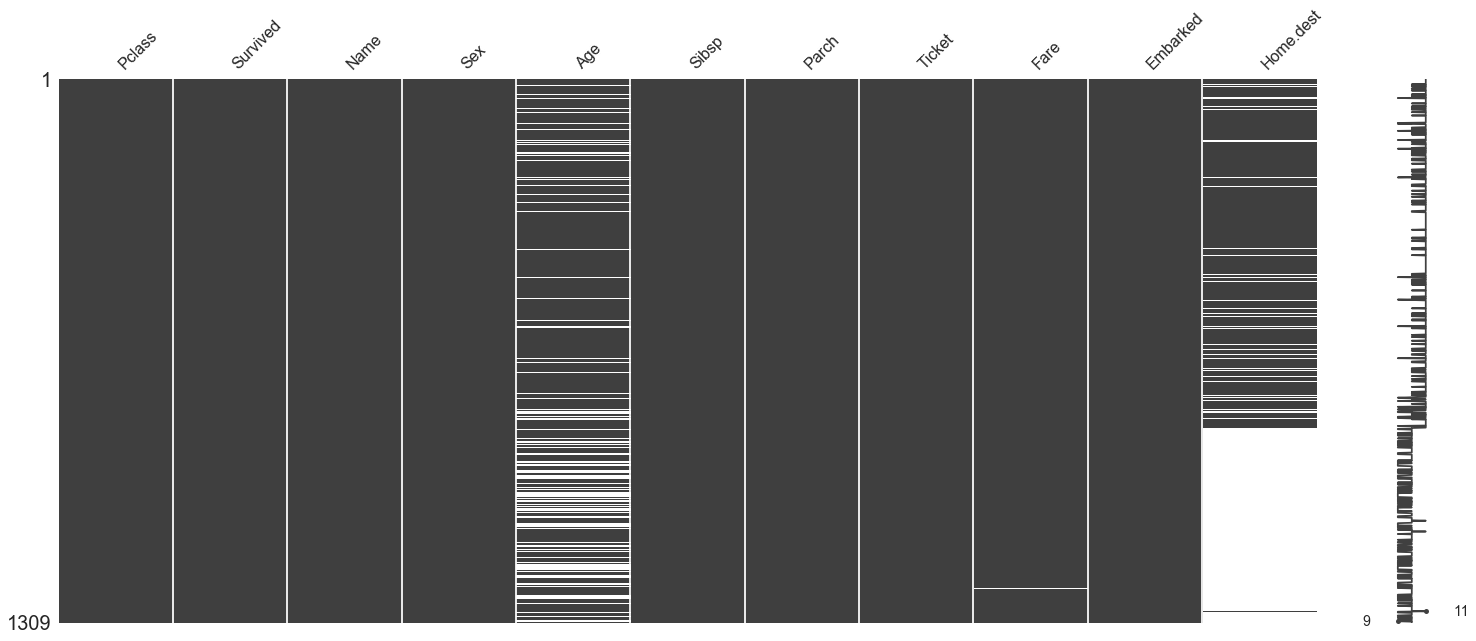

In [71]:
#Drop variable completely
def drop_var(df,var):
    df = df.drop(var,axis=1)
    return df

#Lets start with df3 (which has only 1309 rows)
df4 = drop_var(df3,'Body')
df5 = drop_var(df4,'Cabin')
df6 = drop_var(df5,'Boat')
msno.matrix(df6)
#This data looks managable, lets use this for further testing.

### 3.4 Impute missing data

This is where things get interesting. Replacing missing value (for those which make sense) can be quite useful. This can be done in about 3-4 ways:
- Imputing with a central tendency (mean, median, mode)
- Imputing with a custom value (such as most popular value in a categorical variable)
- Imputing with the value of another variable in the same dataset

Each of these utilize the method fillna(). I have create simple parameterized functions for these as well. The implementation of those is shown below.

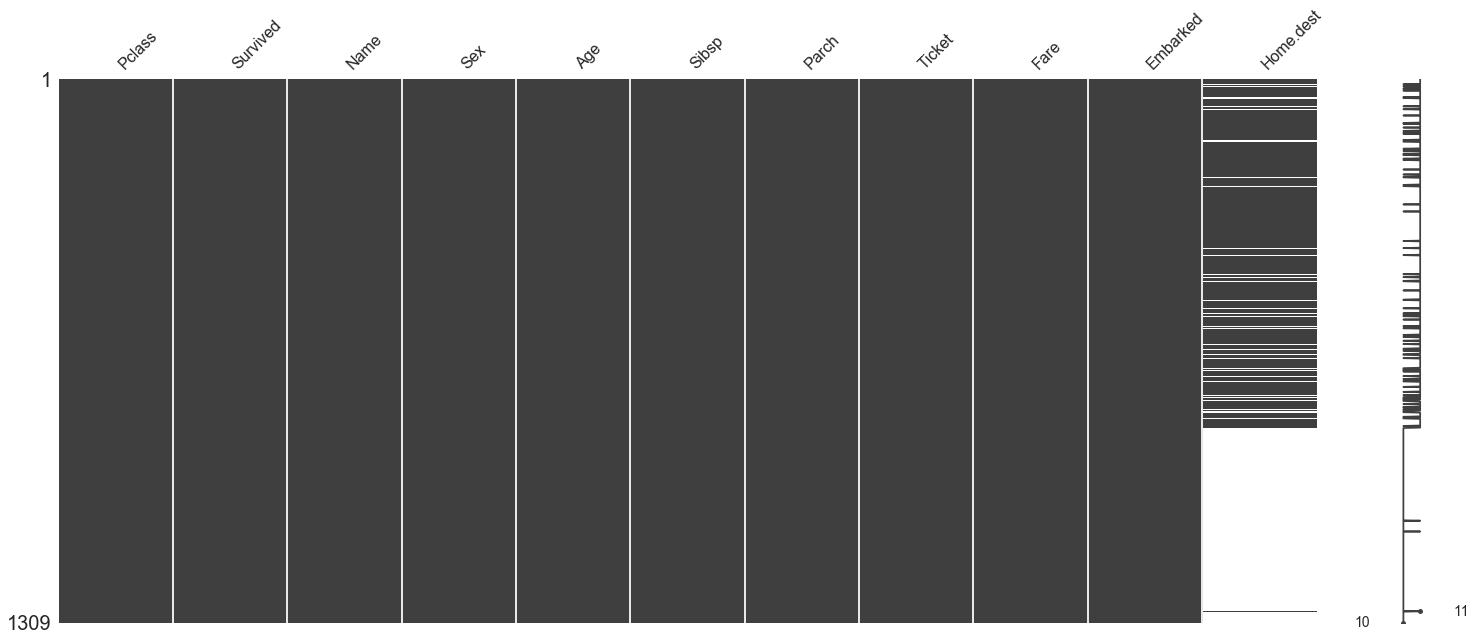

In [345]:
#Lets use replace by mean for Age
def replace_mean(df,var):
    df[var] = df[var].fillna(df[var].mean())
    return df

df7 = replace_mean(df6,'Age')
msno.matrix(df7)

### Some other useful direct replacements

-  Replacing data of a certain variable with a given input value
-  Replacing data of a certain variable with that of another variable

Here I use replacement with most popular value for 1 categorical and 1 continous variables.

Most popular fare value is  8.05
Most popular embarked value is  S


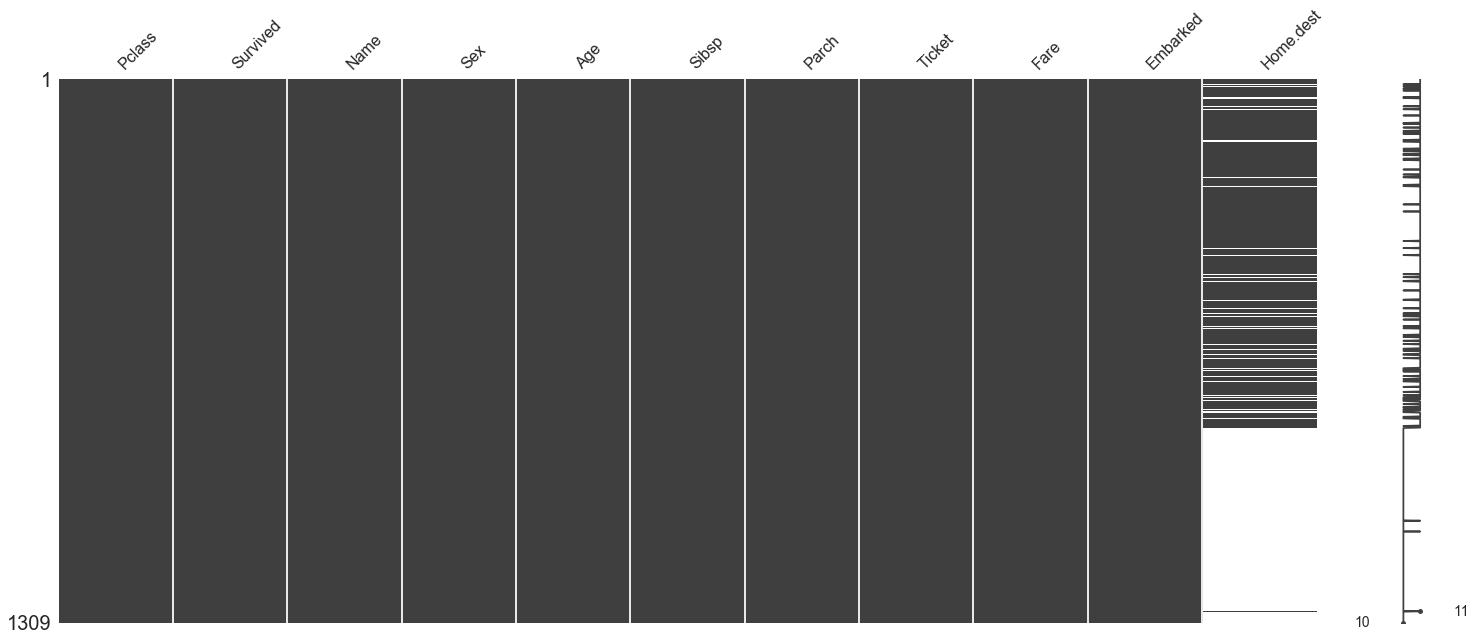

In [346]:
#Replace missing by custom value
def replace_custom(df,var,value):
    df[var] = df[var].fillna(value)
    return df

#Replace missing by another variable
def replace_another(df,var1,var2):
    df[var1] = df[var1].fillna(value=df[var2])
    return df


#Replace the 1 missing value in fare by most popular value
popular_fare = df7['Fare'].value_counts().idxmax()
print("Most popular fare value is ",popular_fare)
df8 = replace_custom(df7,'Fare',popular_fare)

#Replace the 2 missing values in Embarked with most popular categorical value
popular_embarked = df7['Embarked'].value_counts().idxmax()
print("Most popular embarked value is ",popular_embarked)
df9 = replace_custom(df8,'Embarked',popular_embarked)
msno.matrix(df9)

### 3.5 Predict missing data using ML

Suddenly, we are down to only 1 variable with missing data! Now lets try exploring the ML approach for predicting the missing data. You will treat this like any other ML based problem statement, only difference is that the variable that you are predicting for has missing values, and your predictions are going to fill those.

Generally you will follow the following steps:
1. Separate the data with complete data as primary dataset and the data with missing data as the data over which you will make predictions (lets call it prediction dataset).
2. Further break primary dataset into train_X, train_y, test_X and test_y
3. Encode all of the data (use same encoder for the prediction dataset you broke off in first step).
4. Apply any ML algorithm by training it over train_X, train_y.
5. Validate against test_X and test_y.
6. Predict the dependent variable (missing data) by using the encoded prediction dataset.
7. Combine everything in reverse order.

The missing data variable, y variable or dependent variable here is Home.dest

<br>

Before we start however, lets quickly check the nullity correlation map once more. You will notice that the Home.dist variable doesn't really have any nullity correlation with any existing variables (Boat and Cabin got removed) except Age (which is not imputed with mean). 

<b>Why is this important?</b>

If a variable has nullity correlation with with another, it means that if both variables have missing values, my data will not have enough 'knowledge' to allow me to predict one of them. More simply put, if there is no nullity correlation, it means that I have a better chance of predicting a variable from other existing variables since their existence or non-existence should theoretically not effect the variable I am trying to predict.

<p style="color:red; font-size:16px;">A disclaimer here, I will be skipping a few of the steps I defined above in interest of time (my time). I would rather you consider this representative and use it as such. The steps I skill are cross validation, parameter tuning and accuracy measurement which are all critical stages of a ML model. So don't murder me for it please! :) </p>

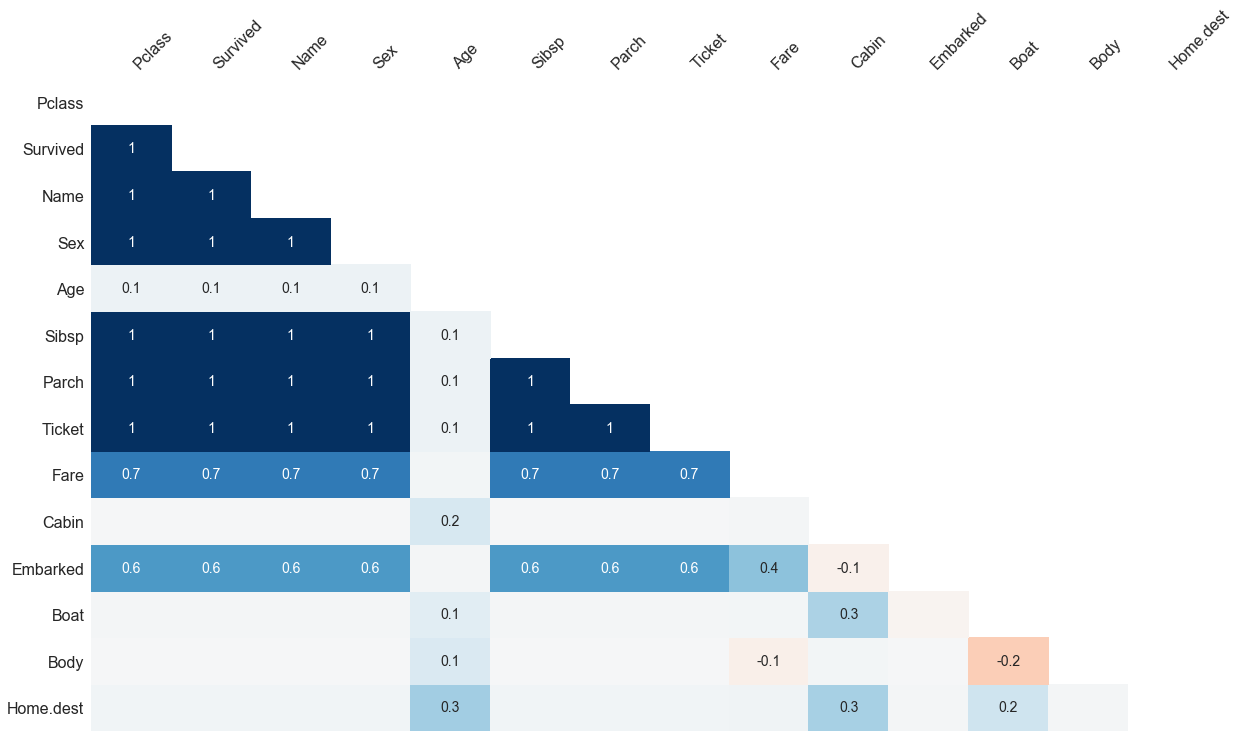

In [347]:
#Remember the 3rd cool visualization from before?
msno.heatmap(df)

In [349]:
#Defining X & y variables
colnames = list(df9.columns)
X = colnames[:10]
y = colnames[-1:]
print("Independent variables ",X)
print("Dependent variable",y)

Independent variables  ['Pclass', 'Survived', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch', 'Ticket', 'Fare', 'Embarked']
Dependent variable ['Home.dest']


In [351]:
#Breaking data into smaller sets
train_X = df9[X][df9['Home.dest'].notnull()]
train_y = df9[y][df9['Home.dest'].notnull()]
pred = df9[X][df9['Home.dest'].isnull()]

print("Rows with complete data (for training) ",train_X.shape)
print("Rows with y value (for training) ",train_y.shape)
print("Rows with missing data (for prediction) ",pred.shape)

#This is a check for the next set of code, to compare if the encoder worked properly. I don't trust them.
random_check = train_X[7:13].copy()
random_check

Rows with complete data (for training)  (745, 10)
Rows with y value (for training)  (745, 1)
Rows with missing data (for prediction)  (564, 10)


Pclass  Survived                                               Name  \
7      1.0       0.0                             Andrews, Mr. Thomas Jr   
8      1.0       1.0      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9      1.0       0.0                            Artagaveytia, Mr. Ramon   
10     1.0       0.0                             Astor, Col. John Jacob   
11     1.0       1.0  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
12     1.0       1.0                      Aubart, Mme. Leontine Pauline   

       Sex   Age  Sibsp  Parch    Ticket      Fare Embarked  
7     male  39.0    0.0    0.0    112050    0.0000        S  
8   female  53.0    2.0    0.0     11769   51.4792        S  
9     male  71.0    0.0    0.0  PC 17609   49.5042        C  
10    male  47.0    1.0    0.0  PC 17757  227.5250        C  
11  female  18.0    1.0    0.0  PC 17757  227.5250        C  
12  female  24.0    0.0    0.0  PC 17477   69.3000        C

In [353]:
#Initializing the encoder
le=LabelEncoder()

#Encode both Train_X and Pred set using same LE
for col in train_X.columns.values:
    if train_X[col].dtypes=='object':
        data=train_X[col].append(pred[col])
        le.fit(data.values)
        train_X[col] = le.transform(train_X[col])
        pred[col] = le.transform(pred[col])

#Comparing with random check to see if its done properly. Checking variation in values in both tables.
train_X[7:13]

Pclass  Survived  Name  Sex   Age  Sibsp  Parch  Ticket      Fare  \
7      1.0       0.0    46    1  39.0    0.0    0.0      15    0.0000   
8      1.0       1.0    50    0  53.0    2.0    0.0      76   51.4792   
9      1.0       0.0    54    1  71.0    0.0    0.0     825   49.5042   
10     1.0       0.0    68    1  47.0    1.0    0.0     833  227.5250   
11     1.0       1.0    69    0  18.0    1.0    0.0     833  227.5250   
12     1.0       1.0    72    0  24.0    0.0    0.0     795   69.3000   

    Embarked  
7          2  
8          2  
9          0  
10         0  
11         0  
12         0

In [354]:
#Encoding y variable as well, same code (no need for the loop, but I am lazy)
for col in train_y.columns.values:
    if train_y[col].dtypes=='object':
        le.fit(train_y.values)
        train_y[col] = le.transform(train_y[col])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [356]:
print("Rows with complete data (for training) ",train_X.shape)
print("Rows with y value (for training) ",train_y.shape)
print("Rows with missing data (for prediction) ",pred.shape)

#Results look good. Ready to start with sklearn.

Rows with complete data (for training)  (745, 10)
Rows with y value (for training)  (745, 1)
Rows with missing data (for prediction)  (564, 10)


In [358]:
#The worst model ever
worst_model = SVC()

worst_model.fit(train_X, train_y)
pred_y = pd.DataFrame(worst_model.predict(pred))
pred_y.columns = ['Home.dest']

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [359]:
#Joining everything back in the most messy way possible
y = pred.reset_index()
a = train_X.join(train_y)
b = y.join(pred_y)
df10 = a.append(b)
df11 = df10.drop('index', 1)

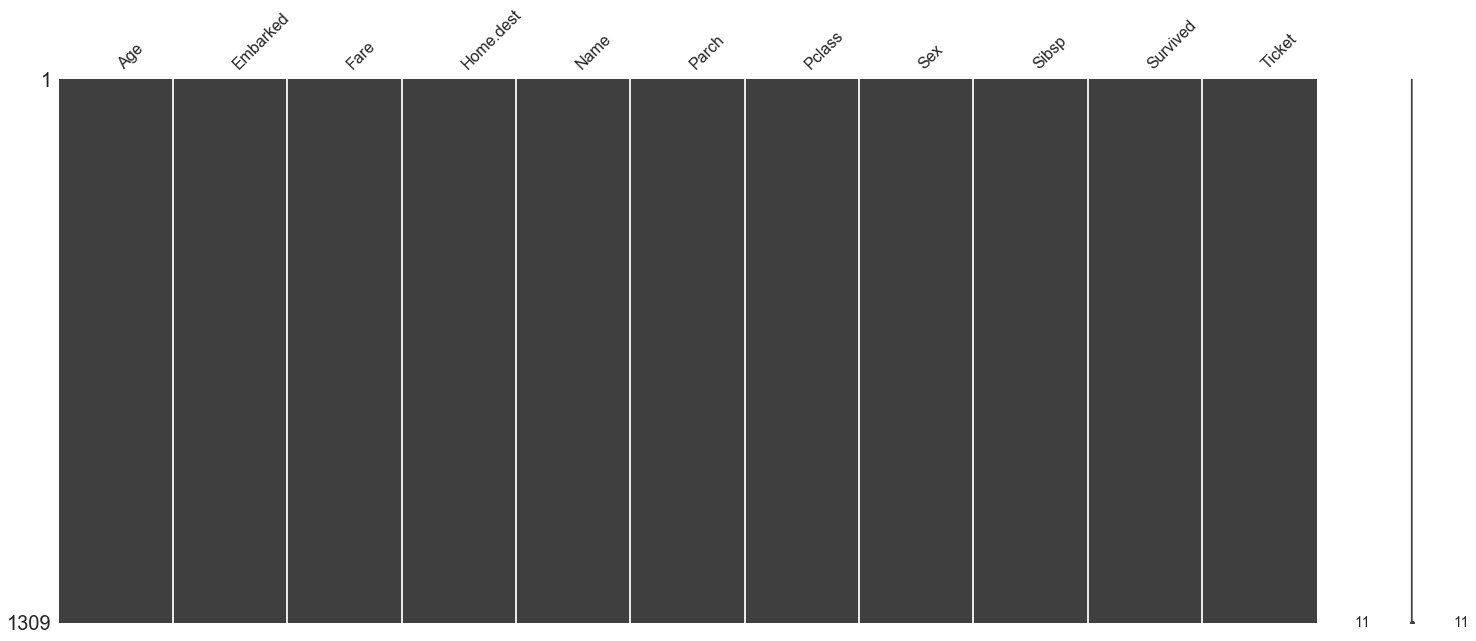

In [360]:
#One final check
msno.matrix(df11)

Success! (more or less). 

The data is encoded, so only frequency analysis can be done with it. Its better to do the EDA before or along side with the missing data handling.

We were able to apply all the different missing data handling techniques, some quite vaguely but understanding is what is imporant here. That and the snippets to copy paste in all future codes. Hope this has helped someone out there. It helps me to put it into such context as it organizes the processes that I have learnt in a single notebook under a single topic.

## References
-  https://github.com/ResidentMario/missingno
-  http://machinelearningmastery.com/handle-missing-data-python/
-  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
-  https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/
-  http://scikit-learn.org/stable/modules/preprocessing_targets.html
-  http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html